In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats
import arviz as az
import numpy as np


In [3]:
flows = pd.read_csv(r"..\..\UK-wood-end-use-flows\build\flows.csv")
flows_obs= pd.read_csv(r'..\..\UK-wood-end-use-flows\build\flows_obs.csv')
Observations = pd.read_excel(r"..\..\UK-wood-end-use-flows\data\observations_with_references.xlsx")
flows_name = pd.read_excel(r'..\..\UK-wood-end-use-flows\lists\flows_name.xlsx')


In [ ]:
#This notebook gives the volume of wood fibres imported in product, construction and paper industries.

In [4]:
flows_name = list(flows_name.to_records())
flows_obs_list = list(flows_obs.to_records())

In [5]:
link = 'http://ukfires.org/analyses/UK-wood/system/'
Consumption = 'Consumption'

In [6]:

link = 'http://ukfires.org/analyses/UK-wood/system/'
consumed_products = []
for flow in flows_name:
            consumption_flow_products = flows.loc[(flows['material'] == flow[3]) 
                                       & (flows['source'] == flow[1])
                                       & (flows['target'] == flow[2])]
            if ((('imports ') in flow[1])):
                if ((('imports '+ link +'HardwoodRoundwood') not in flow[1])
                        and (('imports ' + link +'ForestResidues') not in flow[1])
                        and (('imports ' + link +'OtherEnergyFeedstocks') not in flow[1])
                        and (('imports ' + link +'OtherEnergyFeedstocksWoodFibres') not in flow[1])
                     and (('imports ' + link +'OtherEnergyFeedstocksWoodFibres') not in flow[1])
                     and (('imports ' + link +'PreConsumerWasteConstruction') not in flow[1])
                     and (('imports ' + link +'PreConsumerWasteProducts') not in flow[1])
                     and (('imports ' + link +'RecycledWoodFibre') not in flow[1])
                    and (('imports ' + link +'WoodCharcoal') not in flow[1])
                    and (('imports ' + link +'WoodPellets') not in flow[1])
                     and (('imports ' + link +'WoodPelletsWoodFibres') not in flow[1])
                    and (('imports ' + link +'SoftwoodRoundwood') not in flow[1])
                        and (('imports ' + link +'PostConsumerWood') not in flow[1])
                        ):
                
                                                            
                            consumption_flow_products = consumption_flow_products.set_index("target")
                           # consumption_flow_products=consumption_flow_products["value"].sum()
                            
                            
                          

                            consumed_products.append(consumption_flow_products)

                   

consumed_products = pd.concat(consumed_products)  
consumed_products = consumed_products.groupby(['sample']).sum()
consumed_products
#consumed_products = consumption_flow_products
#consumed_products= consumed_products.reset_index(level='target')
#consumed_products = consumed_products.groupby(['target','sample']).sum()
#consumed_products = consumed_products.reset_index(level='sample')
#consumed_products= consumed_products.reset_index(level='target')
#consumed_products.to_clipboard()
#consumed_products['value']=consumed_products['value'] / 1000000000
#consumed_products.to_clipboard()

C:\Users\rla44\AppData\Local\Temp\ipykernel_13384\2700562195.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  consumed_products = consumed_products.groupby(['sample']).sum()


,value,quantity
sample,,
0,2.709420e+10,2.705896e+10
1,2.746023e+10,2.744862e+10
2,2.797670e+10,2.794876e+10
3,2.798302e+10,2.798005e+10
4,2.751656e+10,2.749383e+10
...,...,...
9995,2.783384e+10,2.779921e+10
9996,2.728425e+10,2.724421e+10
9997,2.778537e+10,2.775742e+10


In [7]:
consumed_products.to_pickle('consumed_products.pkl')

In [35]:
consumed_products['target']= 'imports'
consumed_products

,value,quantity,target
sample,,,
0,2.737315e+10,2.736816e+10,imports
1,2.679584e+10,2.676042e+10,imports
2,2.805939e+10,2.805053e+10,imports
3,2.718276e+10,2.714769e+10,imports
4,2.762873e+10,2.757370e+10,imports
...,...,...,...
9995,2.699902e+10,2.699638e+10,imports
9996,2.720549e+10,2.718748e+10,imports
9997,2.710586e+10,2.707233e+10,imports


In [36]:
Means = consumed_products.groupby('target')['value'].mean()
df= pd.DataFrame(Means)


In [37]:
consumed_products

,value,quantity,target
sample,,,
0,2.737315e+10,2.736816e+10,imports
1,2.679584e+10,2.676042e+10,imports
2,2.805939e+10,2.805053e+10,imports
3,2.718276e+10,2.714769e+10,imports
4,2.762873e+10,2.757370e+10,imports
...,...,...,...
9995,2.699902e+10,2.699638e+10,imports
9996,2.720549e+10,2.718748e+10,imports
9997,2.710586e+10,2.707233e+10,imports


In [ ]:
from 

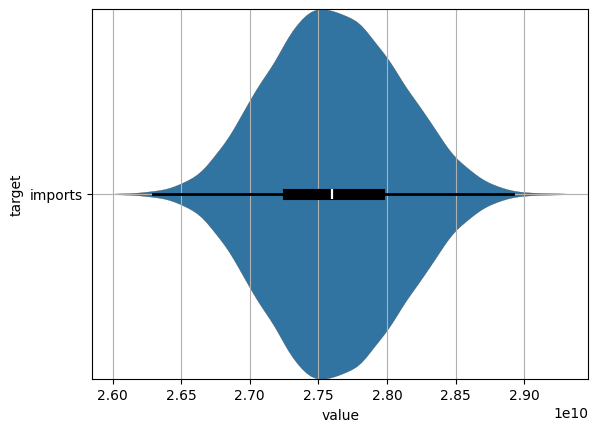

,Object,Uncertainty index,min,max,mean,median,diff_min,diff_max
0,imports,0.095021,2.629637e+10,2.891995e+10,2.761060e+10,2.760023e+10,1.314230e+09,-1.309346e+09


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

         

sns.violinplot(
    x="value",
    y="target",
    width=1,
   # hue= "target",
    data=consumed_products,
    linewidth=0.2,
   # hue="target",
    density_norm="width",
    orient="h",
    inner_kws=dict(box_width=8, whis_width=2, color="black"),
    inner="box",
    cut=0,
    zorder=1,
)

# Set the title of the plot
plt.title("")

# Calculate the difference ratio for each unique 'target'
difference_ratios = []  # List to store the ratios

# Group the data by 'target'
grouped = consumed_products.groupby("target")

for name, group in grouped:
    data = group["value"]
    k = 1.5

    # Calculate quartiles and IQR
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    # Calculate bounds for outlier detection
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR

    # Exclude outliers
    filtered_data = [x for x in data if lower_bound <= x <= upper_bound]

    # Calculate minimum and maximum within the non-outlier range
    min_non_outlier = np.min(filtered_data)
    max_non_outlier = np.max(filtered_data)
    
    mean_val = group["value"].mean()
    median_val = group["value"].median()
    Diff_min =  mean_val - min_non_outlier
    Diff_max =  mean_val - max_non_outlier

    difference_ratio = (max_non_outlier - min_non_outlier) / mean_val

    difference_ratios.append((name, difference_ratio,min_non_outlier,max_non_outlier, mean_val,median_val, Diff_min, Diff_max) )  # Store the target name and ratio
    
    
difference_ratios
plt.grid(True)

plt.show()

difference_ratio_df = pd.DataFrame(difference_ratios, columns=['Object', 'Uncertainty index', 'min', 'max', 'mean', 'median', 'diff_min', 'diff_max'])
difference_ratio_df